In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from models import VGG16
from utils import get_dataset, train, predict, plot_metrics, plot_confusion_matrix

In [2]:
batch_size = 16
img_height = 224
img_width = 224

In [3]:
def format_image(image, label):
    image = image / 255.0
    return  image, label

In [34]:
train_dir = "./data/balanced/train/"
val_dir = "./data/balanced/val/"
test_dir = "./data/balanced/test/"

train_ds = get_dataset(train_dir, batch_size=batch_size)
val_ds = get_dataset(val_dir, batch_size=batch_size)
test_ds = get_dataset(test_dir, batch_size=batch_size, shuffle=False)

Found 3348 files belonging to 4 classes.
Found 417 files belonging to 4 classes.
Found 423 files belonging to 4 classes.


In [35]:
class_names = train_ds.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [37]:
train_ds = train_ds.map(format_image).shuffle(buffer_size=100)
val_ds = val_ds.map(format_image)
test_ds = test_ds.map(format_image)

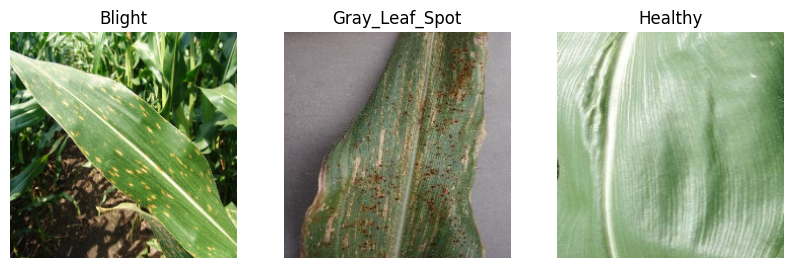

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
model = VGG16(4)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [9]:
epochs = 20
results = train(model=model, train_dataset=train_ds, val_dataset=val_ds,
               optimizer=optimizer, loss_object=loss_object, epochs=epochs)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.14it/s]


Epoch 1/20 - loss: 0.9672 val_loss: 1.1022, accuracy: 0.5287 val_accuracy: 0.5564


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.65it/s]


Epoch 2/20 - loss: 0.8916 val_loss: 0.9313, accuracy: 0.5570 val_accuracy: 0.5468


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.66it/s]


Epoch 3/20 - loss: 0.8636 val_loss: 1.0220, accuracy: 0.5669 val_accuracy: 0.5420


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.64it/s]


Epoch 4/20 - loss: 0.5952 val_loss: 0.6025, accuracy: 0.7479 val_accuracy: 0.8082


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.63it/s]


Epoch 5/20 - loss: 0.4160 val_loss: 0.6040, accuracy: 0.8303 val_accuracy: 0.8321


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.64it/s]


Epoch 6/20 - loss: 0.3191 val_loss: 0.5016, accuracy: 0.8692 val_accuracy: 0.8609


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.63it/s]


Epoch 7/20 - loss: 0.2726 val_loss: 0.6609, accuracy: 0.8877 val_accuracy: 0.8609


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.68it/s]


Epoch 8/20 - loss: 0.2544 val_loss: 0.4310, accuracy: 0.9002 val_accuracy: 0.8777


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.68it/s]


Epoch 9/20 - loss: 0.2142 val_loss: 0.3096, accuracy: 0.9140 val_accuracy: 0.8705


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.68it/s]


Epoch 10/20 - loss: 0.1938 val_loss: 0.4516, accuracy: 0.9211 val_accuracy: 0.8921


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.60it/s]


Epoch 11/20 - loss: 0.1739 val_loss: 0.4062, accuracy: 0.9331 val_accuracy: 0.8969


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.65it/s]


Epoch 12/20 - loss: 0.1306 val_loss: 0.6455, accuracy: 0.9492 val_accuracy: 0.8825


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.56it/s]


Epoch 13/20 - loss: 0.3202 val_loss: 0.3817, accuracy: 0.9017 val_accuracy: 0.8657


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.58it/s]


Epoch 14/20 - loss: 0.1674 val_loss: 0.4751, accuracy: 0.9394 val_accuracy: 0.8873


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.63it/s]


Epoch 15/20 - loss: 0.0846 val_loss: 0.6209, accuracy: 0.9692 val_accuracy: 0.8921


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.50it/s]


Epoch 16/20 - loss: 0.0547 val_loss: 0.5551, accuracy: 0.9794 val_accuracy: 0.8849


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.50it/s]


Epoch 17/20 - loss: 0.0437 val_loss: 0.6262, accuracy: 0.9854 val_accuracy: 0.8945


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.55it/s]


Epoch 18/20 - loss: 0.0290 val_loss: 0.8634, accuracy: 0.9886 val_accuracy: 0.8849


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.50it/s]


Epoch 19/20 - loss: 0.0523 val_loss: 0.7600, accuracy: 0.9818 val_accuracy: 0.8753


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.57it/s]

Epoch 20/20 - loss: 0.0377 val_loss: 0.8473, accuracy: 0.9875 val_accuracy: 0.8873


In [51]:
model.save_weights("./vgg_model.h5")

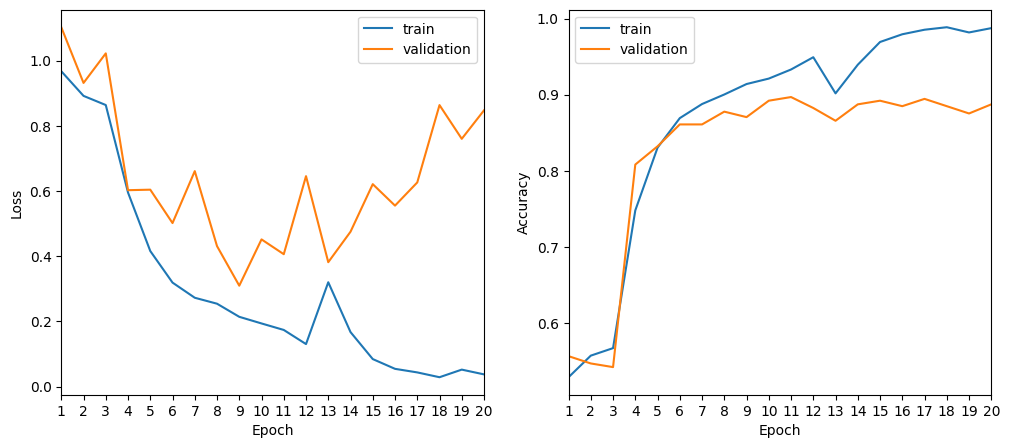

In [70]:
plot_metrics(results)
plt.savefig("./metrics2.jpg", bbox_inches="tight")

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.98it/s]


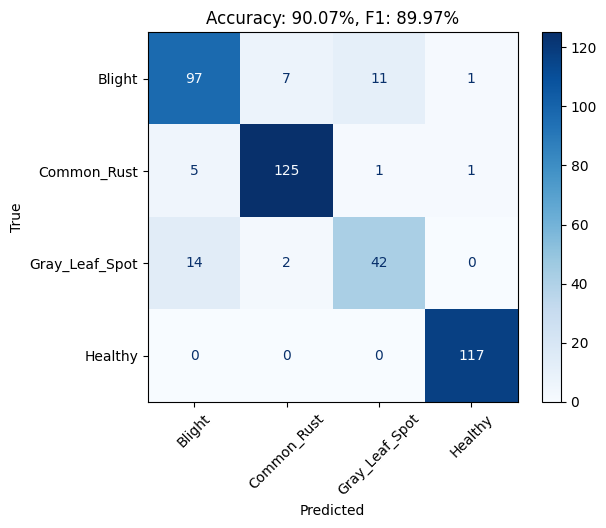

In [92]:
yt, yp = predict(test_ds, model)
plot_confusion_matrix(yt, yp, labels=class_names)

# load saved model

In [76]:
amod = VGG16(4)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.77it/s]


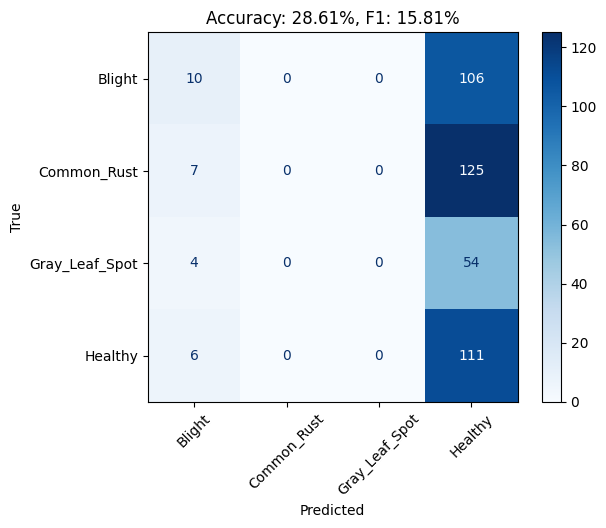

In [93]:
# predict on test_ds to initialize model weights, saved weights can't be loaded otherwise
yt, yp = predict(test_ds, amod)
plot_confusion_matrix(yt, yp, labels=class_names)

In [94]:
amod.load_weights("./vgg_model.h5")

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.41it/s]


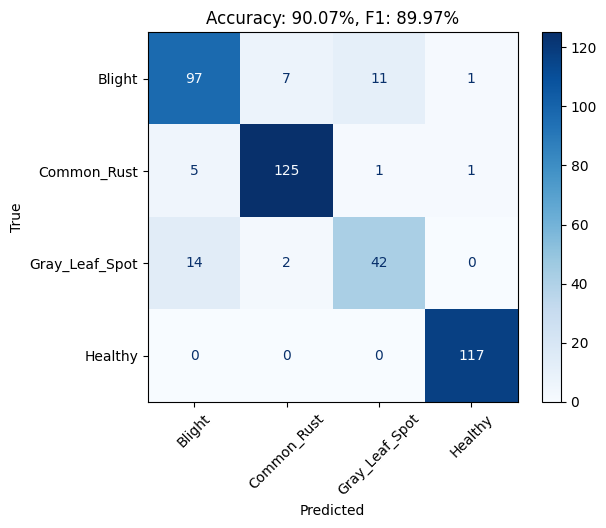

In [95]:
yt, yp = predict(test_ds, amod)
plot_confusion_matrix(yt, yp, labels=class_names)